# 1. Выбор датасета

In [61]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('Affordable_Housing_by_Town_2011-2021.csv', delimiter=',')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Town Code                            1856 non-null   int64  
 1   Town                                 1856 non-null   object 
 2   Year                                 1856 non-null   int64  
 3   2010 Census Units                    1856 non-null   int64  
 4   Government Assisted                  1855 non-null   float64
 5   Tenant Rental Assistance             1856 non-null   int64  
 6    Single Family CHFA/ USDA Mortgages  1856 non-null   int64  
 7   Deed Restricted Units                1856 non-null   int64  
 8   Total Assisted Units                 1856 non-null   int64  
 9   Percent Affordable                   1856 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 145.1+ KB


In [62]:
dataset.columns = dataset.columns.str.replace(' ', '_')
dataset.columns = dataset.columns.str.replace('/', '')
dataset.columns = dataset.columns.str.replace('2010', '_2010')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Town_Code                           1856 non-null   int64  
 1   Town                                1856 non-null   object 
 2   Year                                1856 non-null   int64  
 3   _2010_Census_Units                  1856 non-null   int64  
 4   Government_Assisted                 1855 non-null   float64
 5   Tenant_Rental_Assistance            1856 non-null   int64  
 6   _Single_Family_CHFA_USDA_Mortgages  1856 non-null   int64  
 7   Deed_Restricted_Units               1856 non-null   int64  
 8   Total_Assisted_Units                1856 non-null   int64  
 9   Percent_Affordable                  1856 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 145.1+ KB


# 2. Дискретизация признаков и целевой переменной

In [63]:
dataset = dataset.dropna()
# dataset['Government Assisted'] = dataset['Government Assisted'].astype(int)
dataset = dataset.drop(['Town'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855 entries, 0 to 1855
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Town_Code                           1855 non-null   int64  
 1   Year                                1855 non-null   int64  
 2   _2010_Census_Units                  1855 non-null   int64  
 3   Government_Assisted                 1855 non-null   float64
 4   Tenant_Rental_Assistance            1855 non-null   int64  
 5   _Single_Family_CHFA_USDA_Mortgages  1855 non-null   int64  
 6   Deed_Restricted_Units               1855 non-null   int64  
 7   Total_Assisted_Units                1855 non-null   int64  
 8   Percent_Affordable                  1855 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 144.9 KB


In [64]:
X = dataset.drop(['Percent_Affordable'], axis=1)
y = dataset[['Percent_Affordable']]
y = y.squeeze()

# 3. Получение центроидов

In [65]:
from sklearn.cluster import KMeans

models = {}
labels = {}
for col in X.columns:
  model = KMeans(n_clusters = 5)
  model.fit(X[[col]])
  centers = model.cluster_centers_.tolist()
  centers = sum(centers, [])
  centers = sorted(centers)
  models[col] = centers
  labels[col] = model.labels_

models

{'Town_Code': [16.465909090908852,
  49.49999999999987,
  84.0130548302872,
  118.43010752688161,
  152.49999999999974],
 'Year': [2011.5, 2013.5, 2016.0039761431412, 2018.5, 2020.5],
 '_2010_Census_Units': [2316.8201438848337,
  7216.831365935928,
  14454.153846153855,
  25642.999999999978,
  52472.99999999999],
 'Government_Assisted': [159.56718266253728,
  1607.9342105263158,
  3309.4594594594596,
  5474.310344827586,
  9567.227272727276],
 'Tenant_Rental_Assistance': [46.11426844014562,
  1075.0445859872618,
  3583.6363636363644,
  6261.090909090911,
  8338.909090909092],
 '_Single_Family_CHFA_USDA_Mortgages': [39.53122590593722,
  233.8950819672129,
  465.4415584415587,
  1014.7922077922083,
  1748.0909090909088],
 'Deed_Restricted_Units': [5.43231707317096,
  92.07801418439715,
  294.50000000000006,
  593.9047619047617,
  1273.6363636363635],
 'Total_Assisted_Units': [187.24465049928972,
  1235.4844961240315,
  3832.614285714283,
  9903.30303030303,
  18421.22727272727]}

# 4. Формирование датафрейма с дискретными данными

In [66]:
import pandas as pd

X_clust = pd.DataFrame(data = labels)
X_clust.head()

,Town_Code,Year,_2010_Census_Units,Government_Assisted,Tenant_Rental_Assistance,_Single_Family_CHFA_USDA_Mortgages,Deed_Restricted_Units,Total_Assisted_Units
0,3,2,0,0,0,0,0,0
1,3,2,4,0,2,2,0,4
2,3,2,0,0,0,0,0,0
3,3,2,4,0,0,0,0,0
4,3,2,0,0,0,0,0,0


In [68]:
model = KMeans(n_clusters = 5)
model.fit(y.to_frame())
y_centers = model.cluster_centers_.tolist()
y_centers = sum(y_centers, [])
y_centers = sorted(y_centers)
y_labels = model.labels_

y_centers

[2.2043944265809228,
 6.3851877133105805,
 13.291466666666667,
 20.7951282051282,
 32.72636363636363]

# 5. Инициализация нечетких множеств
# 6. Генерация комбинаций значений

In [69]:
!pip install fuzzylogic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from fuzzylogic.functions import S, R, triangular

def make_fuzzy_set(col_min, col_max, center):
  if col_min == center:
    return S(col_min, col_max)
  elif col_max == center:
    return R(col_min, col_max)
  else:
    return triangular(col_min, col_max, c=center)

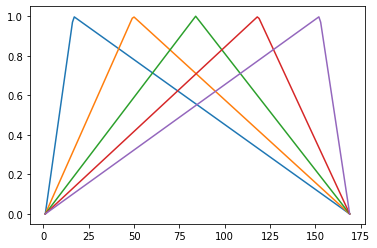

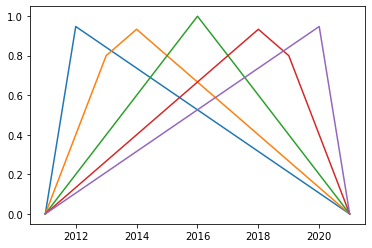

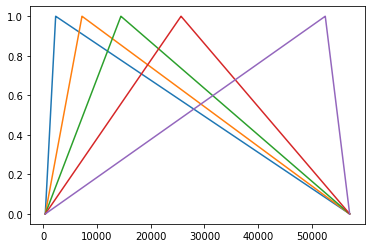

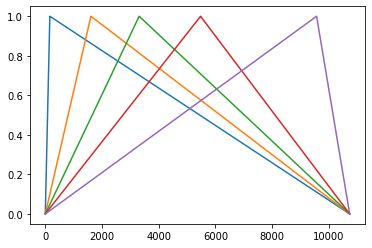

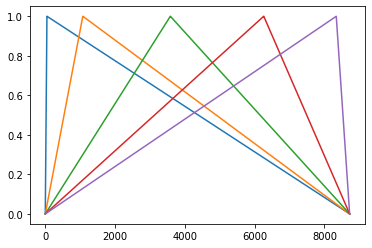

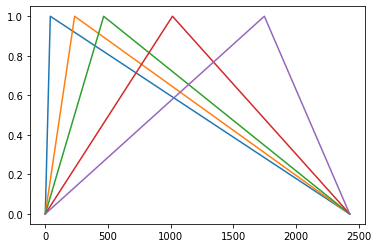

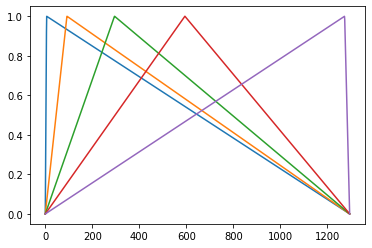

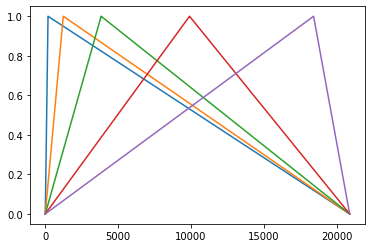

In [71]:
from fuzzylogic.classes import Domain
from matplotlib import pyplot as plt

for key, value in models.items():
  plt.figure()
  X_col = X[key]
  col_min = X_col.min()
  col_max = X_col.max()
  exec(f'{key} = Domain(key, col_min, col_max)')
  for i, rank in enumerate(['very_low', 'low', 'medium', 'high', 'very_high']):
    exec(f'{key}.{rank} = make_fuzzy_set(col_min, col_max, value[{i}])')
    exec(f'{key}.{rank}.plot()')

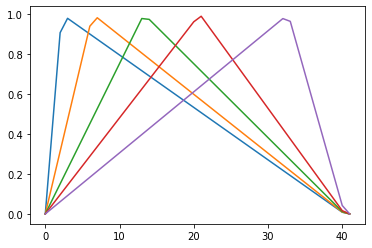

In [72]:
y_min = y.min()
y_max = y.max()
exec(f'{y.name} = Domain(y.name, y_min, y_max)')
for i, rank in enumerate(['very_low', 'low', 'medium', 'high', 'very_high']):
  exec(f'{y.name}.{rank} = make_fuzzy_set(y_min, y_max, y_centers[{i}])')
  exec(f'{y.name}.{rank}.plot()')

# 7. Предсказание с помощью наивного байесовского классификатора

In [73]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_clust, y_labels)

model.feature_log_prob_

array([[-1.02684549, -1.03017513, -1.52665172, -8.52516136, -8.52516136,
        -4.35077409, -2.96064095, -5.960212  ],
       [-2.15604866, -2.25646741, -2.10634899, -1.73165555, -2.16886935,
        -1.83239711, -2.65841758, -1.99193864],
       [-1.94390547, -1.93460308, -1.71145953, -2.1058748 , -2.69972376,
        -1.95802335, -3.76892216, -1.72263283],
       [-1.96909348, -2.01490302, -1.68514973, -2.14843441, -2.09624866,
        -1.70787799, -3.60883675, -2.36712361],
       [-1.45684767, -1.56328578, -1.34320171, -5.24589562, -5.02275206,
        -2.20991294, -2.98338875, -2.08434629]])

In [74]:
from itertools import product

X_comb = []
for comb in product(*len(X_clust.columns)*[[0,1,2]]):
  X_comb.append(comb)
X_comb = pd.DataFrame(X_comb, columns = X_clust.columns)

X_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6561 entries, 0 to 6560
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Town_Code                           6561 non-null   int64
 1   Year                                6561 non-null   int64
 2   _2010_Census_Units                  6561 non-null   int64
 3   Government_Assisted                 6561 non-null   int64
 4   Tenant_Rental_Assistance            6561 non-null   int64
 5   _Single_Family_CHFA_USDA_Mortgages  6561 non-null   int64
 6   Deed_Restricted_Units               6561 non-null   int64
 7   Total_Assisted_Units                6561 non-null   int64
dtypes: int64(8)
memory usage: 410.2 KB


In [75]:
preds = model.predict(X_comb)

preds[:10]

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4], dtype=int32)

# 8. Конвертация в правила вывода

In [76]:
map = {
    0: 'very_low',
    1: 'low',
    2: 'medium',
    3: 'high',
    4: 'very_high'
}

In [77]:
from fuzzylogic.classes import Rule

rules = []
for i, row in X_comb.iterrows():
  cond = []
  for col in X_comb.columns:
    cond.append('.'.join([col, map[row[col]]]))
  cond = ', '.join(cond)
  cons = '.'.join([y.name, map[preds[i]]])
  rules.append(f'({cond}): {cons}')

rules = eval('Rule({' + ',\n'.join(rules) + ',})')

rules

# 9. Нечеткий вывод

In [78]:
X_test = X[:200]
values = []
for i, row in X_test.iterrows():
  value = {}
  for col in X_test.columns:
    value[eval(col)] = row[col]
  values.append(value)

values[:5]

[{Domain('Town_Code', 1, 169, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7f357e8515e0>), 'low': Set(<function triangular.<locals>.f at 0x7f357e7b4dc0>), 'medium': Set(<function triangular.<locals>.f at 0x7f357e7bb550>), 'high': Set(<function triangular.<locals>.f at 0x7f357e7bbca0>), 'very_high': Set(<function triangular.<locals>.f at 0x7f357e7bd430>)}): 1.0,
  Domain('Year', 2011, 2021, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7f357e7c4160>), 'low': Set(<function triangular.<locals>.f at 0x7f357e7ee820>), 'medium': Set(<function triangular.<locals>.f at 0x7f357e776040>), 'high': Set(<function triangular.<locals>.f at 0x7f357e776700>), 'very_high': Set(<function triangular.<locals>.f at 0x7f357e776e50>)}): 2020.0,
  Domain('_2010_Census_Units', 388, 57012, res=1, sets={'very_low': Set(<function triangular.<locals>.f at 0x7f357e77cb80>), 'low': Set(<function triangular.<locals>.f at 0x7f357e5db1f0>), 'medium': Set(<function triangular.<loc

In [79]:
preds = [rules(x) for x in values]

preds[:10]

[None,
 None,
 None,
 None,
 None,
 None,
 17.897759361910833,
 None,
 18.612060244049072,
 None]

In [80]:
y_test = y[:200]
df_test = pd.DataFrame(data = {'y_pred': preds, 'y_true': y_test})
df_test = df_test.dropna()

df_test

,y_pred,y_true
6,17.897759,9.24
8,18.612060,6.28
13,17.911637,3.50
14,17.167762,20.66
17,18.752515,5.62
...,...,...
186,19.215198,5.58
189,19.267908,1.28
191,18.689435,7.12
193,18.688504,3.78


# 10. Оценка точности

In [81]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_test['y_true'], df_test['y_pred'])

155.4766833546012

# 11. Сравнение с точностью линейной регрессии

In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
preds = model.predict(X_test)

mean_squared_error(y_test, preds)

8.871944769626475